In [1]:
%load_ext autoreload
%autoreload 2
import k2movie
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#Initialise the movie object
mov = k2movie.movie(channel=58,
                  cadence='all',
                  campaign=8,
                  data_dir='/Volumes/cupertino/database/', outfile='rollingband.mp4')

/Users/ch/K2/projects/k2movie/k2movie/k2movie.py:660: RuntimeWarning: invalid value encountered in log10
  ar=np.log10(ar)


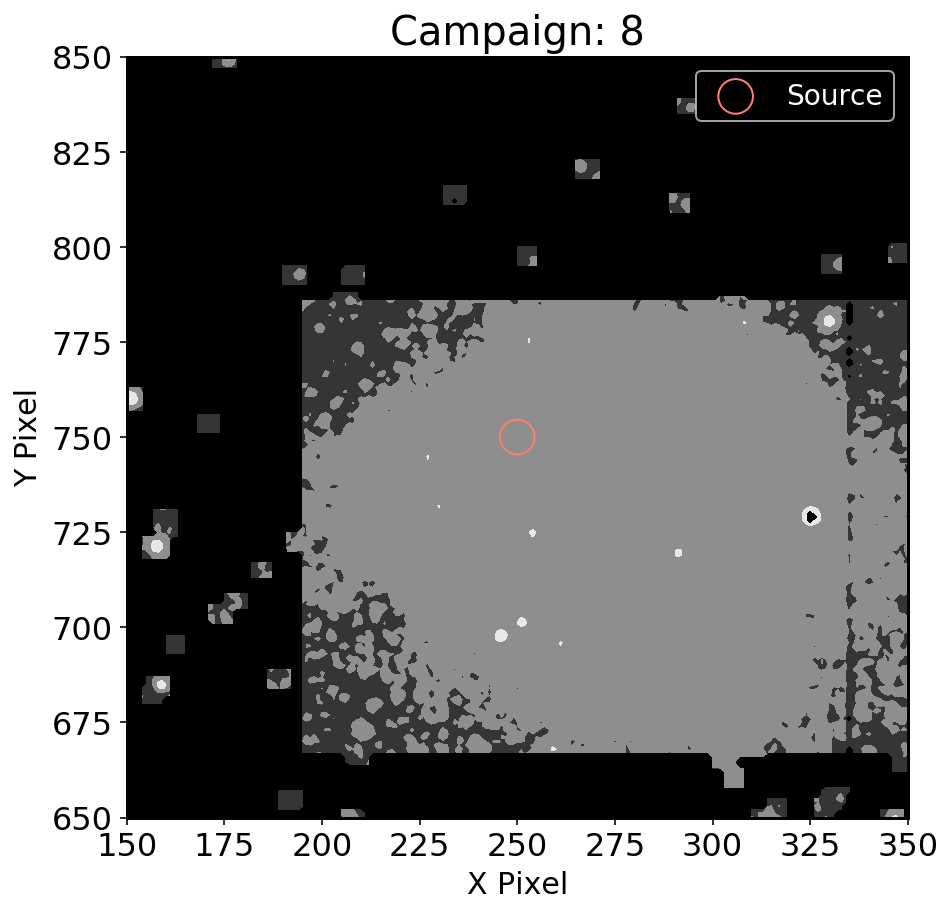

In [2]:
#%debug
fig, ax = plt.subplots(1,figsize=(7,7))

#Specify a source location on the focal plane
mov.loc=(250,750)
mov.tol = 100
mov.inspect(ax, radec=False)


In [7]:
#All cadences are being added to the movie. This will take a few minutes.
mov.cadence = None
mov.cadence = np.arange(50,400)
mov.scale = 'linear'
mov.vmin = 10
mov.vmax = 70
mov.frameinterval = 30
mov.colorbar=True
mov.cmap='inferno'
mov.compute()

/Users/ch/miniconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


<Figure size 288x288 with 0 Axes>

In [8]:
import io
import base64
from IPython.display import HTML

video = io.open('rollingband.mp4', 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))